In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1.) Import and preprocess the dataset.

df=pd.read_csv("/content/Housing.csv")

# One-Hot Encoded every categorical column so that its easy for machine to understand
df_encoded=pd.get_dummies(df,drop_first=True)

# x is input, from which we will predict y that is price
x=df_encoded.drop("price",axis=1)
y=df_encoded["price"]

In [3]:
# 2.) Split data into train-test sets.

# training and testing X and Y
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
# 3.) Fit a Linear Regression model using sklearn.linear_model.

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [5]:
# 4.) Evaluate model using MAE, MSE, R².

y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error : {mae: ,.2f}")
print(f"Mean Squared Error : {mse: ,.2f}")
print(f"R2 Score : {r2: ,.2f}")

Mean Absolute Error :  970,043.40
Mean Squared Error :  1,754,318,687,330.66
R2 Score :  0.65


/tmp/ipython-input-6-420994161.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficients", y="Features", data=coef_df, palette='coolwarm')


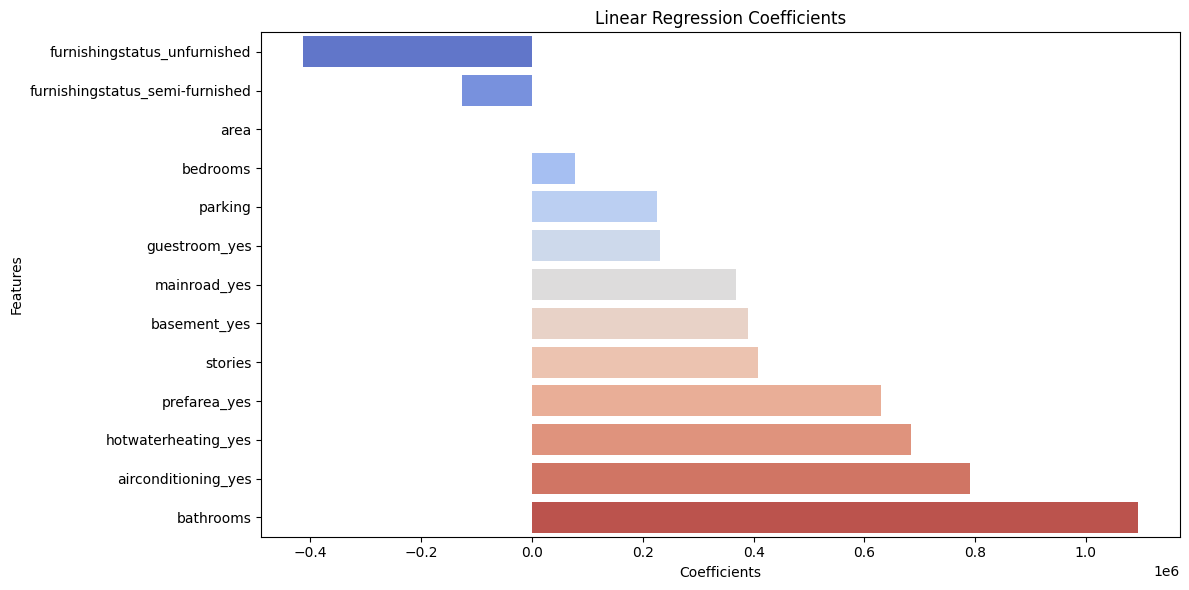

In [6]:
# 5.) Plot regression line and interpret coefficients.

# Created a new dataframe to interpret coefficients
coef_df=pd.DataFrame({
    "Features":x.columns,             # <------- stores the coolumns that were present in x training which didnt include price
    "Coefficients":model.coef_        # <------- it stores the values of how each Feature impacts the predicted price
}).sort_values("Coefficients")


# plotting the regression line
plt.figure(figsize=(12,6))
sns.barplot(x="Coefficients", y="Features", data=coef_df, palette='coolwarm')
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()

**1️ What assumptions does linear regression make?**

Ans :

Linear regression assumes:

A linear relationship between independent and dependent variables

Errors (residuals) are normally distributed

Constant variance of errors (homoscedasticity)

No strong multicollinearity among features

Observations are independent of each other

**2️ How do you interpret the coefficients?**

Ans :

Each coefficient represents the change in the target variable for a one-unit increase in the corresponding feature, assuming all other features remain constant.
For example, if the coefficient of area is 150, it means the price increases by ₹150 for every additional square foot.

**3️ What is R² score and its significance?**

Ans :

R² (coefficient of determination) measures how well the model explains the variability of the target variable.

An R² of 1 means perfect prediction

R² of 0 means the model predicts no better than the mean

A negative R² indicates a poor model

It's a key indicator of the model’s goodness of fit.

**4️ When would you prefer MSE over MAE?**

Ans :

MSE (Mean Squared Error) is preferred when larger errors should be penalized more heavily, as it squares the error values.
MAE (Mean Absolute Error) treats all errors equally.
MSE is often used when optimizing models like Ridge or Lasso.

**5️ How do you detect multicollinearity?**

Ans :

Multicollinearity can be detected using:

Correlation matrix to check for high correlations between features

Variance Inflation Factor (VIF) — a VIF above 5 or 10 indicates potential multicollinearity

**6️ What is the difference between simple and multiple regression?**

Ans :

Simple linear regression involves one independent variable predicting the target

Multiple linear regression involves two or more independent variables

Multiple regression helps capture more complex relationships.

**7️ Can linear regression be used for classification?**

Ans :

No, linear regression is designed for predicting continuous variables.
For classification problems, logistic regression is more appropriate as it outputs probabilities and handles categorical outcomes.

**8️ What happens if you violate regression assumptions?**

Ans :

Violating assumptions can lead to:

Biased or unreliable predictions

Incorrect estimation of coefficients

Poor model performance

It's important to test and validate assumptions before trusting the model.